# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred'
                 '/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['price'], x_vars=df.columns.drop('price'));

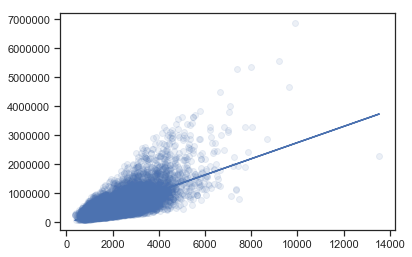

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

targets = ['price']
predictors = ['sqft_living']

y = df[targets].values
X = df[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

plt.scatter(X_train, y_train, alpha=0.1)
plt.plot(X_train, [beta_i * _ + beta_0 for _ in X_train]);

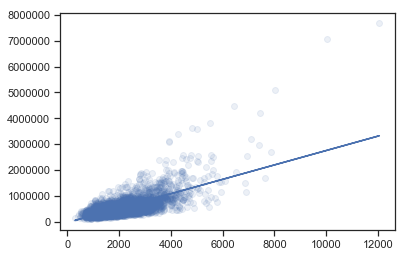

In [4]:
plt.scatter(X_test, y_test, alpha=0.1)
plt.plot(X_test, [beta_i * _ + beta_0 for _ in X_test]);

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [5]:
predictors = ['sqft_living', 'grade']

y = df[targets].values
X = df[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

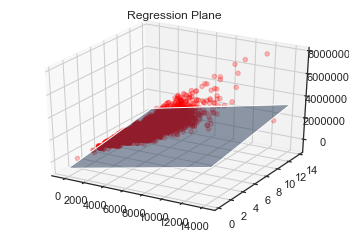

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['sqft_living'], df['grade'], 
           df[targets], c='red', alpha=0.25)

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane
plt3d.plot_surface(xx, yy, zz, alpha=0.5)
plt.title("Regression Plane")

plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_predict = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_predict))
R2 = r2_score(y_test, y_test_predict)

print("RMSE:", RMSE)
print("R^2:", R2)

RMSE: 243902.4135296513
R^2: 0.5419797450455692


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [8]:
predictors = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above',
    'yr_built', 'lat', 'long', 'sqft_living15',
    'sqft_lot15'
]


y = df[targets].values
X = df[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

y_test_predict = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_predict))
R2 = r2_score(y_test, y_test_predict)

print("RMSE:", RMSE)
print("R^2:", R2)

RMSE: 199136.76998962593
R^2: 0.7009570190793255


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
